In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/FODS CaseStudy/train.csv')
test = pd.read_csv('/content/drive/MyDrive/FODS CaseStudy/test.csv')

#Train explicit

In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
for i in train.columns:
    print(train[i].value_counts())

2047      1
295621    1
84604     1
82557     1
88702     1
         ..
107934    1
109983    1
21920     1
23969     1
2049      1
Name: id, Length: 381109, dtype: int64
Male      206089
Female    175020
Name: Gender, dtype: int64
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64
1    380297
0       812
Name: Driving_License, dtype: int64
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026


#Test Explicit

In [ ]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [ ]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


#Visualization(categorical data)

In [ ]:
cat_f = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']  #categorical data
num_f = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']  #numerical data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


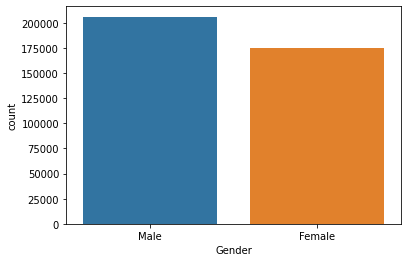

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


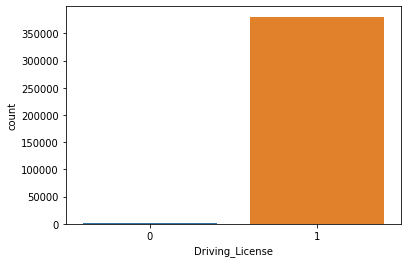

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


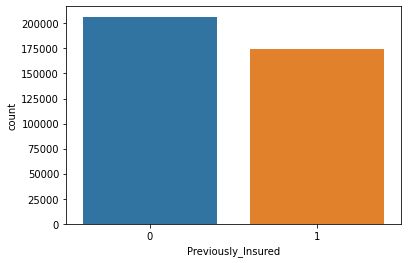

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


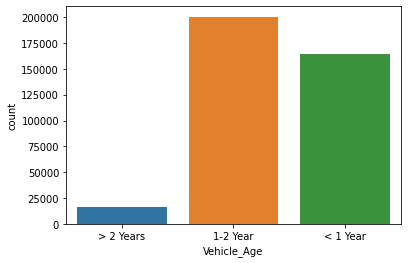

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


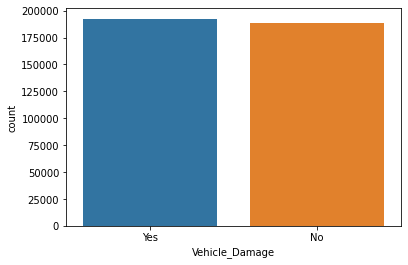

In [ ]:
for i in cat_f:
    sns.countplot(train[i])
    plt.show()

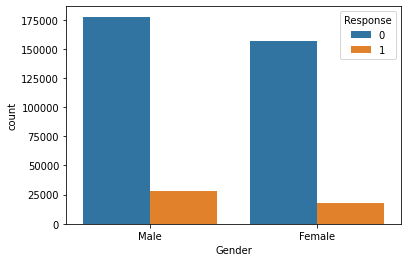

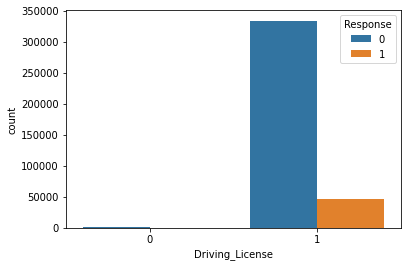

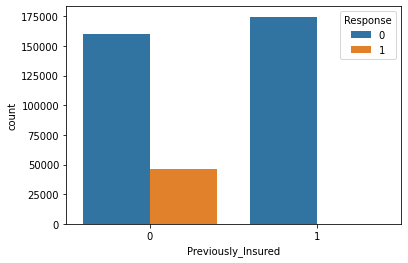

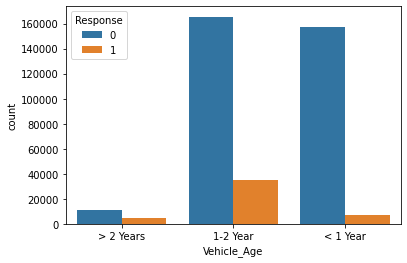

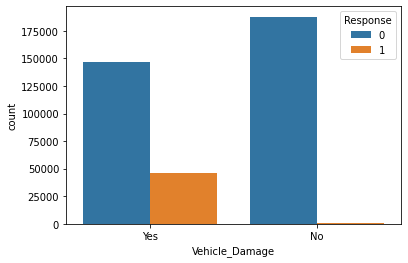

In [ ]:
for i in cat_f:
    sns.countplot(x = i, hue = 'Response', data = train)
    plt.show()

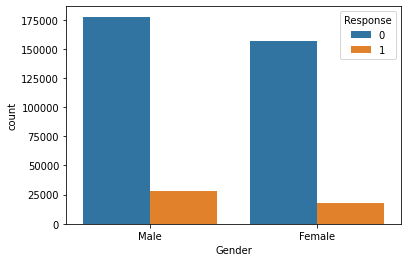

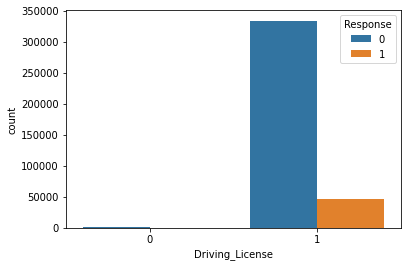

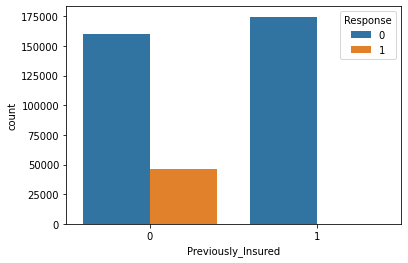

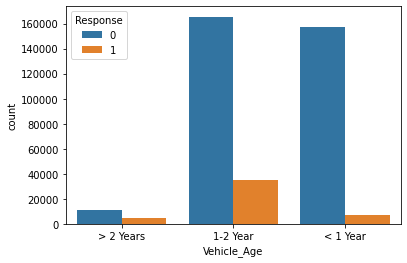

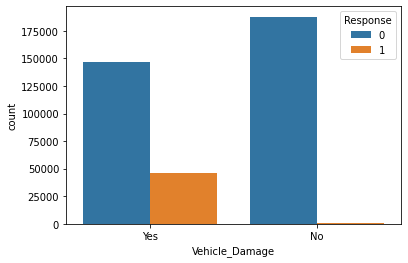

In [ ]:
for i in cat_f:
    sns.countplot(x = i, hue = 'Response', data = train)
    plt.show()

In [ ]:
pd.pivot_table(train, index='Response', values=['Age','Region_Code','Annual_Premium','Vintage','Policy_Sales_Channel'])
#pivot table

,Age,Annual_Premium,Policy_Sales_Channel,Region_Code,Vintage
Response,,,,,
0,38.178227,30419.160276,114.851040,26.336544,154.380243
1,43.435560,31604.092742,91.869086,26.762963,154.112246


In [ ]:
for i in train[cat_f]:
    print(pd.pivot_table(train,index='Response',columns=i, values='Age'))
    print("=="*20)

Gender       Female       Male
Response                      
0         35.692945  40.373375
1         42.235634  44.200526
Driving_License          0          1
Response                             
0                65.952010  38.114043
1                59.073171  43.421822
Previously_Insured          0          1
Response                                
0                   42.162760  34.525781
1                   43.461828  35.696203
Vehicle_Age   1-2 Year   < 1 Year  > 2 Years
Response                                    
0            49.761410  24.730594  56.046351
1            45.572344  26.819217  53.069332
Vehicle_Damage         No        Yes
Response                            
0               34.625031  42.725282
1               35.969450  43.595893


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


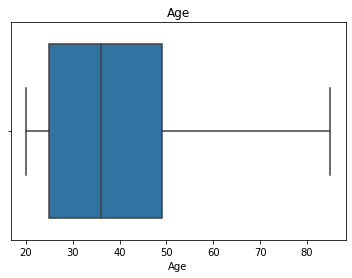

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


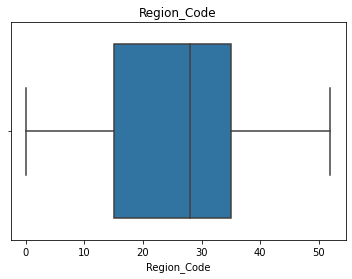

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


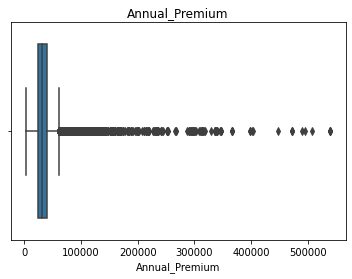

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


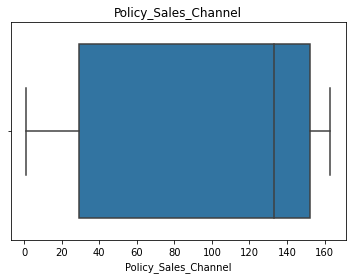

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


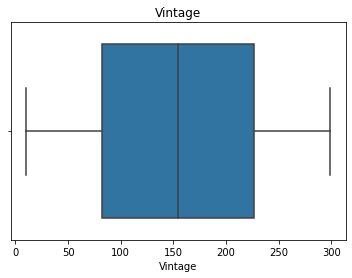

In [ ]:
# dealing with outliers values
for i in train[num_f]:
    sns.boxplot(train[i])
    plt.title(i)
    plt.show()

In [ ]:
train_data_cat = train[['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage']]
train_data_num = train[['Age','Region_Code','Annual_Premium','Vintage','Policy_Sales_Channel']]

In [ ]:
def outlinefree(dataCol):     
      
    sorted(dataCol)                          # sort column
    Q1,Q3 = np.percentile(dataCol,[25,75])   # getting 25% and 75% percentile
    IQR = Q3-Q1                              # getting IQR 
    LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
    UpperRange = Q3+(1.5 * IQR)              # getting Upperrange 
    
    colname = dataCol.tolist()               # convert column into list  
    newlist =[]                              # empty list for store new values
    for i in range(len(colname)):
        
        if colname[i] > UpperRange:          # list number > Upperrange 
            colname[i] = UpperRange          # then number = Upperrange
            newlist.append(colname[i])       # append value to empty list
        elif colname[i] < LowerRange:        # list number < Lowrange 
            colname[i] = LowerRange          # then number = Lowrange
            newlist.append(colname[i])       # append value to empty list 
        else:
            colname[i]                       # list number
            newlist.append(colname[i])       # append value to empty list
            
        

    return newlist

In [ ]:
for i in range(len(train_data_num.columns)):
    new_list =  outlinefree(train.loc[:,train_data_num.columns[i]]) # retrun new list
    train.loc[:,train_data_num.columns[i]] = new_list 

In [ ]:
train_data_num_new = train[['Age','Region_Code','Annual_Premium','Vintage','Policy_Sales_Channel']]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


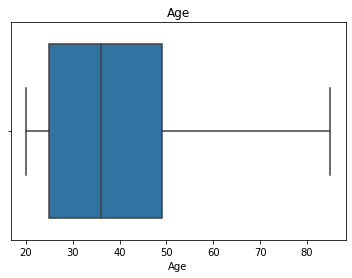

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


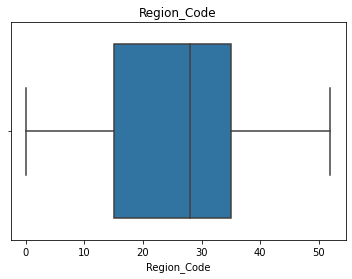

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


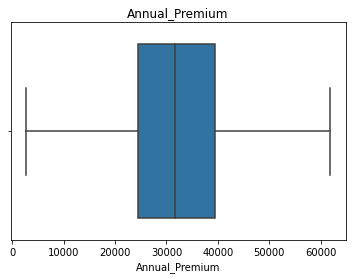

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


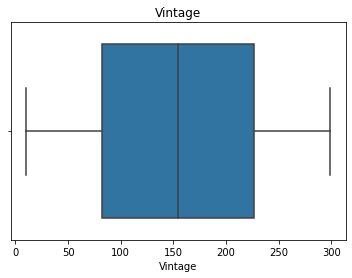

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


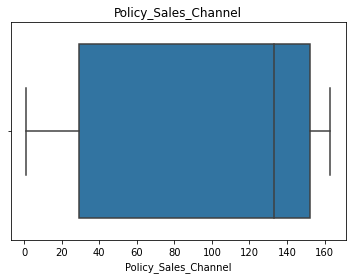

In [ ]:
# dealing with outliers values
for i in train_data_num_new.columns:
    sns.boxplot(train_data_num_new[i])
    plt.title(i)
    plt.show()

In [ ]:
train.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

#Feauture Engineering

ordinal encoding

In [ ]:
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [ ]:
age_ordering = ['< 1 Year', '1-2 Year', '> 2 Years']

train = ordinal_encode(train, 'Vehicle_Age', age_ordering)
test = ordinal_encode(test, 'Vehicle_Age', age_ordering)

In [ ]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,0,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,0,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,0,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,0,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,2,Yes,44617.0,124.0,74,0


one hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse = False, drop = 'first', categories = 'auto')
ohe.fit(train[['Gender','Driving_License','Previously_Insured','Vehicle_Damage']])
ohecategory_train = ohe.transform(train[['Gender','Driving_License','Previously_Insured','Vehicle_Damage']])
ohecategory_test = ohe.transform(test[['Gender','Driving_License','Previously_Insured','Vehicle_Damage']])
for i in range(ohecategory_train.shape[1]):
    train['dummy' + str(i)] = ohecategory_train[:,i]

for i in range(ohecategory_test.shape[1]):
    test['dummy' + str(i)] = ohecategory_test[:,i]

In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,dummy0,dummy1,dummy2,dummy3
0,1,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1,1.0,1.0,0.0,1.0
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0,1.0,1.0,0.0,0.0
2,3,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1,1.0,1.0,0.0,1.0
3,4,Male,21,1,11.0,1,0,No,28619.0,152.0,203,0,1.0,1.0,1.0,0.0
4,5,Female,29,1,41.0,1,0,No,27496.0,152.0,39,0,0.0,1.0,1.0,0.0


In [ ]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,dummy0,dummy1,dummy2,dummy3
0,381110,Male,25,1,11.0,1,0,No,35786.0,152.0,53,1.0,1.0,1.0,0.0
1,381111,Male,40,1,28.0,0,1,Yes,33762.0,7.0,111,1.0,1.0,0.0,1.0
2,381112,Male,47,1,28.0,0,1,Yes,40050.0,124.0,199,1.0,1.0,0.0,1.0
3,381113,Male,24,1,27.0,1,0,Yes,37356.0,152.0,187,1.0,1.0,1.0,1.0
4,381114,Male,27,1,28.0,1,0,No,59097.0,152.0,297,1.0,1.0,1.0,0.0


#Visualization(Numerical data )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


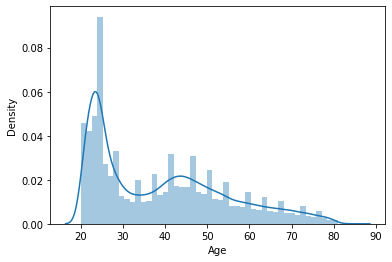

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


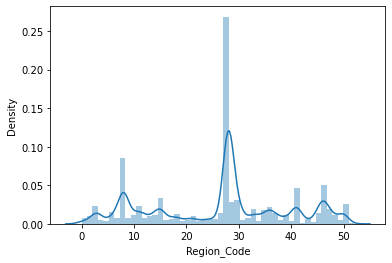

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


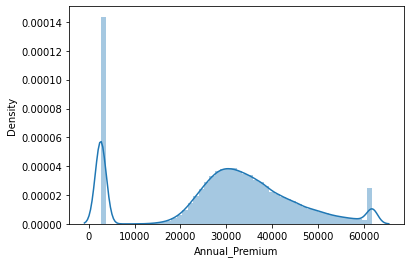

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


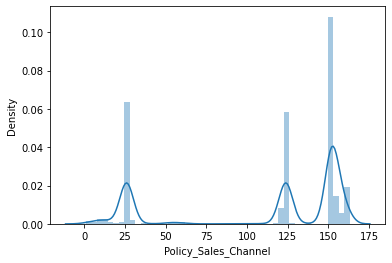

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


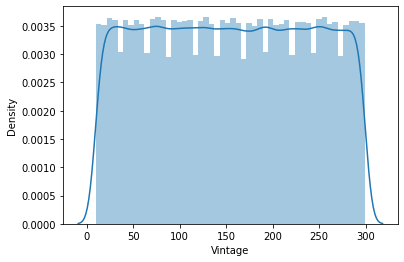

In [ ]:
for i in num_f:
    sns.distplot(train[i])
    plt.show()

In [ ]:
print('Unique values:' )
for i in num_f:
    print(i,':',len(train[i].unique()))

Unique values:
Age : 66
Region_Code : 53
Annual_Premium : 41668
Policy_Sales_Channel : 155
Vintage : 290


In [ ]:
train_t = train.drop(columns = ['dummy0','dummy1','dummy2','dummy3'])

In [ ]:
train_t.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.000878,0.003024,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.066876,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.012521,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,0.043778,-0.009714,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,-0.380873,0.007220,0.219381,0.002537,-0.341170
Vehicle_Age,0.000878,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.039417,-0.550663,-0.001892,0.221874
Annual_Premium,0.003024,0.066876,-0.012521,-0.009714,0.007220,0.039417,1.000000,-0.118185,-0.000772,0.022054
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.118185,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.001892,-0.000772,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.221874,0.022054,-0.139042,-0.001050,1.000000


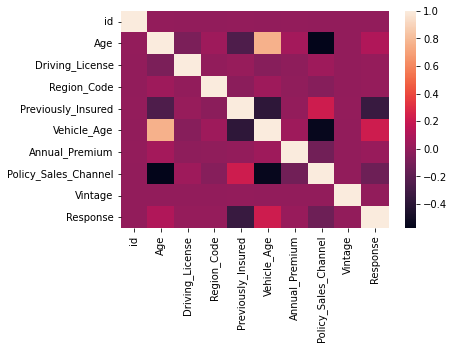

In [ ]:
sns.heatmap(train_t.corr())

#Feature Selection with hypothesis test

Chi-test: It is help to figure-out relation between features and label with "pvalue <= 0.1"

In [ ]:
k = pd.crosstab(train['Vintage'],train['Response'])

In [ ]:
k

Response,0,1
Vintage,,
10,1164,147
11,1153,191
12,1092,165
13,1145,184
14,1104,156
...,...,...
295,1118,157
296,1146,156
297,1142,142


In [ ]:
#Here, the Null Hypothesis (H0): Vintage and Response are independent. 
#Alternate Hypothesis (H1): Vintage and Response variables are not independent.

ct = pd.crosstab(train['Vintage'],train['Response'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue : ",pvalue)

if pvalue <= 0.01:
    print("Alternate Hypothesis passed. Vintage and Response have Relationship")
else:
    print("Null hypothesis passed. Vintage and Response doesnot have  Relationship")

pvalue :  0.8862939415964791
Null hypothesis passed. Vintage and Response doesnot have  Relationship


In [ ]:
ct = pd.crosstab(train['Annual_Premium'],train['Response'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue : ",pvalue)

if pvalue <= 0.01:
    print("Alternate Hypothesis passed. Annual_Premium and Response have Relationship")
else:
    print("Null hypothesis passed. Annual_Premium and Response doesnot have  Relationship")

pvalue :  2.187433386741815e-15
Alternate Hypothesis passed. Annual_Premium and Response have Relationship


In [ ]:
ct = pd.crosstab(train['Policy_Sales_Channel'],train['Response'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue : ",pvalue)

if pvalue <= 0.01:
    print("Alternate Hypothesis passed. Policy_Sales_Channel and Response have Relationship")
else:
    print("Null hypothesis passed. Policy_Sales_Channel and Response doesnot have  Relationship")

pvalue :  0.0
Alternate Hypothesis passed. Policy_Sales_Channel and Response have Relationship


In [ ]:
df_clean = train.copy()

In [ ]:
#feature selection test for categorical data
from scipy.stats import f_oneway, ttest_ind, chi2_contingency


for i in cat_f:
    crosstab = pd.crosstab(df_clean['Response'], train[i])
    #print(crosstab)
    stat,p_value,_,_=chi2_contingency(crosstab)
   
    if p_value < 0.01:
        print(f"Feature {i} has significant difference in Output feature with p_value {np.round(p_value,3)}")
    else:
        print(f"Feature {i} has no significant difference in Output feature with p_value {np.round(p_value,3)}")

Feature Gender has significant difference in Output feature with p_value 0.0
Feature Driving_License has significant difference in Output feature with p_value 0.0
Feature Previously_Insured has significant difference in Output feature with p_value 0.0
Feature Vehicle_Age has significant difference in Output feature with p_value 0.0
Feature Vehicle_Damage has significant difference in Output feature with p_value 0.0


In [ ]:
train_data_1 = train.loc[:,['Response','Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel']]

#here, since the Vitage feature has no relationship with our target feauture 'Response', hence it's got removed

In [ ]:
final_train_data = pd.get_dummies(train_data_1)

In [ ]:
final_train_data.columns

Index(['Response', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Annual_Premium',
       'Policy_Sales_Channel', 'Gender_Female', 'Gender_Male',
       'Vehicle_Damage_No', 'Vehicle_Damage_Yes'],
      dtype='object')

In [ ]:
features = final_train_data.iloc[:,1:].values
label = final_train_data.iloc[:,0].values

#Hypothesis Testing

In [ ]:
final_train_data

,Response,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,44,1,28.0,0,2,40454.0,26.0,0,1,0,1
1,0,76,1,3.0,0,1,33536.0,26.0,0,1,1,0
2,1,47,1,28.0,0,2,38294.0,26.0,0,1,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,0,1,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,74,1,26.0,1,1,30170.0,26.0,0,1,1,0
381105,0,30,1,37.0,1,0,40016.0,152.0,0,1,1,0
381106,0,21,1,30.0,1,0,35118.0,160.0,0,1,1,0
381107,0,68,1,14.0,0,2,44617.0,124.0,1,0,0,1


In [ ]:
final_train_data['Annual_Premium'].mean()

30148.169353124696

In [ ]:
final_train_data['Annual_Premium'].std()

15476.398118073375

In [ ]:
import scipy.stats as st

In [ ]:
data = final_train_data['Annual_Premium'].sample(32,random_state=101)

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data['Annual_Premium'].mean()   #sample mean

32110.0625

In [ ]:
st.norm.interval(alpha=0.10,loc=np.mean(data),scale=st.sem(data))

(array([31772.64208288]), array([32447.48291712]))

In [ ]:
np.std(data)

Annual_Premium    14950.320212
dtype: float64

In [ ]:
z_critical=abs(st.norm.ppf(0.10/2))
z_critical

1.6448536269514729

Considering the Annual Premium of the Cistomers, we can tell that the average Annual Premium is 30148.12 rupees. A sample of 32 persons has an average Annual Premium of 32110 rupees. The standard deviation of the Annual Premium is 15476.4 rupees. At α = 0.1, is there enough evidence to reject the claim.

In [ ]:
#H0 : mu=30148.12,  Ha : != mu
n = 32                                   # random sample
xbar =  32110                            #sample mean
mu = 30148.12                            #population mean
sigma =  15476.4                         #population standard deviation
alpha = 0.1

In [ ]:
z=(xbar-mu)/(sigma/np.sqrt(n))
z

0.7170963024342947

In [ ]:
p_val=(1-st.norm.cdf(z))*2
p_val

0.4733146771140899

In [ ]:
if(p_val>alpha): #2 tailed
  print('Accept Null hypothesis')
else:
  print('Reject Null Hypothesis')

Accept Null hypothesis


# T-Test

In [ ]:
final_train_data['Annual_Premium'].mean()

30148.169353124696

In [ ]:
dataf = final_train_data['Annual_Premium'].sample(10,random_state=101)

In [ ]:
st.norm.interval(alpha=0.10,loc=np.mean(dataf),scale=st.sem(dataf))

(34430.977613605566, 35668.62238639445)

In [ ]:
np.std(dataf)

14773.573621842483

In [ ]:
np.mean(dataf)

35049.8

In [ ]:
#H0 : mu=30148.12  Ha :  mu!=99.2
n = 10                            # random sample
degrees_of_freedom = n-1
xbar = 35049.8                    #sample mean
mu = 30148.12                     #population mean
sigma =  14773.5                  #sample standard deviation
alpha = 0.1

In [ ]:
t=(xbar-mu)/(sigma/np.sqrt(n))
t

1.0492079169657937

In [ ]:
t_critical=abs(st.t.ppf(alpha/2,degrees_of_freedom))
t_critical

1.8331129326536337

In [ ]:
if(t<t_critical): #2 tail
  print('Accept Null hypothesis')
else:
  print('Reject Null Hypothesis')

Accept Null hypothesis


#Model Building

In [ ]:
from sklearn.metrics import confusion_matrix ,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=70)

classimodel= LogisticRegression()  
classimodel.fit(X_train, y_train)
  

y_predlogi =  classimodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predlogi),'\n')
print(confusion_matrix(y_test, y_predlogi))

 f1 score:  0.045274476513865305 

[[83189   491]
 [11318   280]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_predlogi),'\n')
print(' recall score: ',recall_score(y_test, y_predlogi),'\n')
print('Accuracy:', accuracy_score(y_test, y_predlogi))


 precision score:  0.3631647211413748 

 recall score:  0.02414209346439041 

Accuracy: 0.8760574319360188


#Naive Baye's Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=94)

NBmodel = GaussianNB()  
NBmodel.fit(X_train, y_train) 

y_predNB =  NBmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_predNB),'\n')     #harmonic mean of precision and recall
print(confusion_matrix(y_test, y_predNB))

 f1 score:  0.40513759626721524 

[[63490 19938]
 [ 3775  8075]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_predNB),'\n')
print(' recall score: ',recall_score(y_test, y_predNB),'\n')
print('Accuracy:', accuracy_score(y_test, y_predNB))

 precision score:  0.28825902259665154 

 recall score:  0.6814345991561181 

Accuracy: 0.7511177816494888


#Decision Tree Classifier

In [ ]:
from sklearn import tree

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=34)

DTmodel=  tree.DecisionTreeClassifier(criterion = 'entropy',splitter = 'random', max_depth=4)  
DTmodel.fit(X_train, y_train)

y_pred =  DTmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.0 

[[83725     0]
 [11553     0]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print('Accuracy:', accuracy_score(y_test, y_pred))

 precision score:  0.0 

 recall score:  0.0 

Accuracy: 0.8787443061357292


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=2)

RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=4) 
RFmodel.fit(X_train, y_train) 

y_pred =  RFmodel.predict(X_test)
print(' f1 score: ',f1_score(y_test, y_pred),'\n')
print(confusion_matrix(y_test, y_pred))

 f1 score:  0.0 

[[83790     0]
 [11488     0]]


In [ ]:
print(' precision score: ',precision_score(y_test, y_pred),'\n')
print(' recall score: ',recall_score(y_test, y_pred),'\n')
print('Accuracy:', accuracy_score(y_test, y_pred))

 precision score:  0.0 

 recall score:  0.0 

Accuracy: 0.8794265202879993


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

Logistic Regression (f1 score: 0.0 )

#naive bayes (f1 score: 0.4182915181587346)

DecisionTreeClassifier (f1 score: 0.0)

RandomForestClassifier (f1 score: 0.0)

#Receiver Operating Characteristic Score (ROC AUC)

#Logistic Regression ROC Score

0.8233789568647557


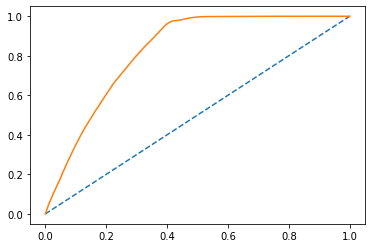

In [ ]:

probabilityValues = classimodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

#Naive Baye's ROC Score

0.8221238235401243


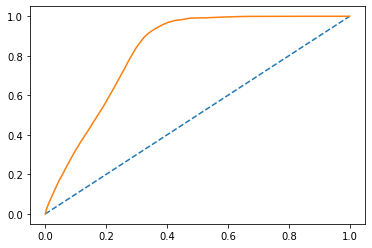

In [ ]:
probabilityValues = NBmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

#Decision Tree ROC Score

0.8283348471481311


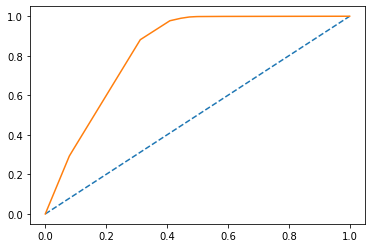

In [ ]:
probabilityValues = DTmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

#Random Forest ROC Score

0.8433370018939623


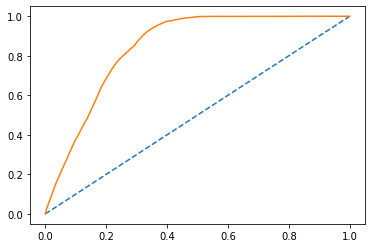

In [ ]:
probabilityValues = RFmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

Logistic Regression (auc: 0.8118786282323492)

naive bayes (auc: 0.8214481948289034)

DecisionTreeClassifier (auc: 0.829889187907877)

RandomForestClassifier (auc: 0.845225109832536)

In [ ]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
GaussianNB(priors=None, var_smoothing=1.0)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.519911082952933e-08)


GaussianNB(var_smoothing=1.0)

In [ ]:
y_pred = nbModel_grid.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[83788     2]
 [11486     2]] : is the confusion matrix
0.8794265202879993 : is the accuracy score
0.5 : is the precision score
0.00017409470752089137 : is the recall score
0.00034806822137138876 : is the f1 score


In [ ]:
if y_pred.all()==y_test.all():
  print('true')

true
